In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
from sklearn.decomposition import PCA

In [4]:
df2024 = pd.read_csv('../data/crawler/unified-events-statistics-with-kills.csv')
df2023 = pd.read_csv('../data/crawler/unified-events-statistics-with-kills-2023.csv')

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning:

Columns (116,117,118,119,120,121,122,123,124,125,126,127) have mixed types.Specify dtype option on import or set low_memory=False.



In [5]:
df2024 = df2024.drop(['game','blueTopChampion','blueJungleChampion','blueMidChampion','blueADCChampion','blueSupportChampion','redTopChampion','redJungleChampion','redMidChampion','redAdcChampion','redSupportChampion'],axis=1)

In [6]:
frames = [df2024, df2023]
df = pd.concat(frames)

In [7]:
y = df.result
event_columns = [f'event{i}' for i in range(1, 201)]  # Gera os nomes das colunas de eventos
df['qtd_eventos'] = df[event_columns].notnull().sum(axis=1)

time_columns = [f'event{i}time' for i in range(1, 201)]  # Assumindo que vai de event1time até event200time

# Encontre o tempo do último evento em cada partida. O método max(axis=1) pega o maior valor entre as colunas de tempo para cada linha.
# Se os tempos estiverem em um formato que não seja segundos e precisarem de conversão, ajuste conforme necessário.
df['duracao_min'] = df[time_columns].max(axis=1)
df['duracao_min'] = df['duracao_min'].astype(int)

df.head()

,golId,event1,event2,event3,event4,event5,event6,event7,event8,event9,...,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,game,qtd_eventos,duracao_min
0,55051,RED: first_blood,BLUE: kill,BLUE: dragon,RED: plate,BLUE: kill,BLUE: voidgrub,BLUE: voidgrub,BLUE: kill,RED: kill,...,3,0.67,1.64,0,0.0,0.0,1,NaN,50,26
1,55298,BLUE: dragon,BLUE: voidgrub,BLUE: voidgrub,BLUE: voidgrub,RED: plate,RED: plate,BLUE: kill,RED: plate,BLUE: kill,...,2,1.00,12.50,0,0.0,0.0,1,NaN,54,32
2,54632,RED: first_blood,RED: kill,RED: kill,BLUE: kill,RED: plate,RED: voidgrub,RED: kill,RED: plate,RED: voidgrub,...,0,0.00,0.00,0,0.0,0.0,0,NaN,58,29
3,55305,BLUE: first_blood,BLUE: voidgrub,BLUE: voidgrub,BLUE: voidgrub,BLUE: dragon,RED: kill,RED: kill,BLUE: kill,RED: kill,...,0,0.00,0.00,0,0.0,0.0,1,NaN,62,31
4,54634,BLUE: first_blood,BLUE: kill,BLUE: dragon,RED: voidgrub,BLUE: voidgrub,BLUE: voidgrub,RED: kill,BLUE: plate,BLUE: kill,...,0,0.00,0.00,0,0.0,0.0,0,NaN,67,34


In [19]:
df['result'].value_counts(normalize=True) * 100

1    52.206603
0    47.793397
Name: result, dtype: float64

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[[Text(0, 0, 'Red team win'), Text(1, 0, 'Blue team win')]]

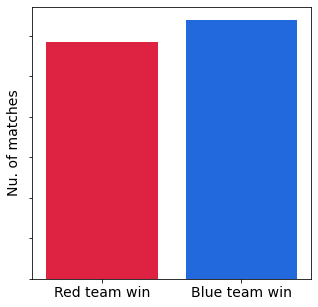

In [8]:
# Supondo que você já tenha seus dados e dataframe df

# Configurando a figura e os subgráficos
fig, ax = plt.subplots(figsize=(5, 5))

ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)

# Primeiro gráfico com largura ajustada
sns.countplot(y, palette=['#fc032d', '#0362fc'])
ax.set_xlabel('')
ax.set_ylabel('Nu. of matches')
ax.set(xticklabels=["Red team win", "Blue team win"])

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



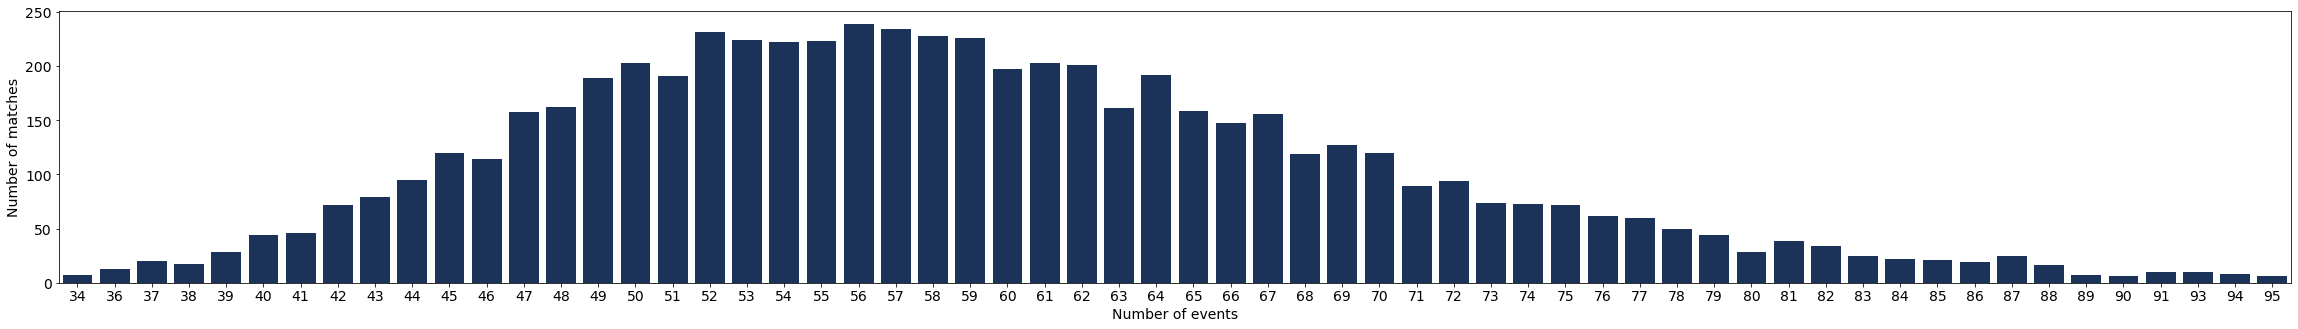

In [9]:
counts = df['qtd_eventos'].value_counts()

# Filtrar 'qtd_eventos' que têm 5 ou mais partidas
filtered_events = counts[counts >= 5].index

# Filtrar o DataFrame para manter apenas as linhas que atendem ao critério
filtered_df = df[df['qtd_eventos'].isin(filtered_events)]

# Agora, plote o gráfico usando o DataFrame filtrado
fig, ax = plt.subplots(figsize=(40, 5))
sns.countplot(filtered_df['qtd_eventos'], color='#112f63', ax=ax)

# Configurando os títulos e fontes dos eixos
ax.set_xlabel('Number of events', fontsize=14)
ax.set_ylabel('Number of matches', fontsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.show()

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Nu. of matches')

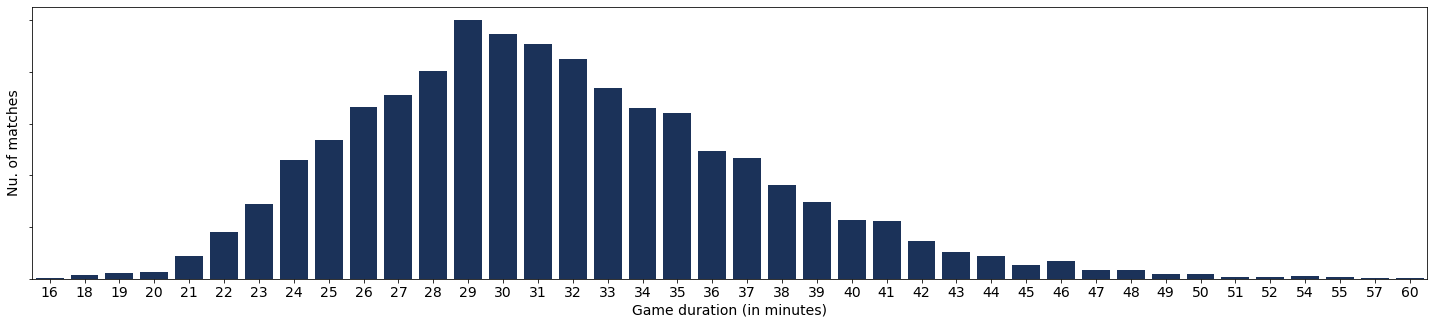

In [10]:
# Supondo que você já tenha seus dados e dataframe df

# Configurando a figura e os subgráficos
fig, ax = plt.subplots(figsize=(25, 5))

ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)

# Terceiro gráfico
sns.countplot(df.sort_values(by=['duracao_min'])['duracao_min'], color='#112f63')
ax.set_xlabel('Game duration (in minutes)')
ax.set_ylabel('Nu. of matches')

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:32: UserWarning:

FixedFormatter should only be used together with FixedLocator

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following vari

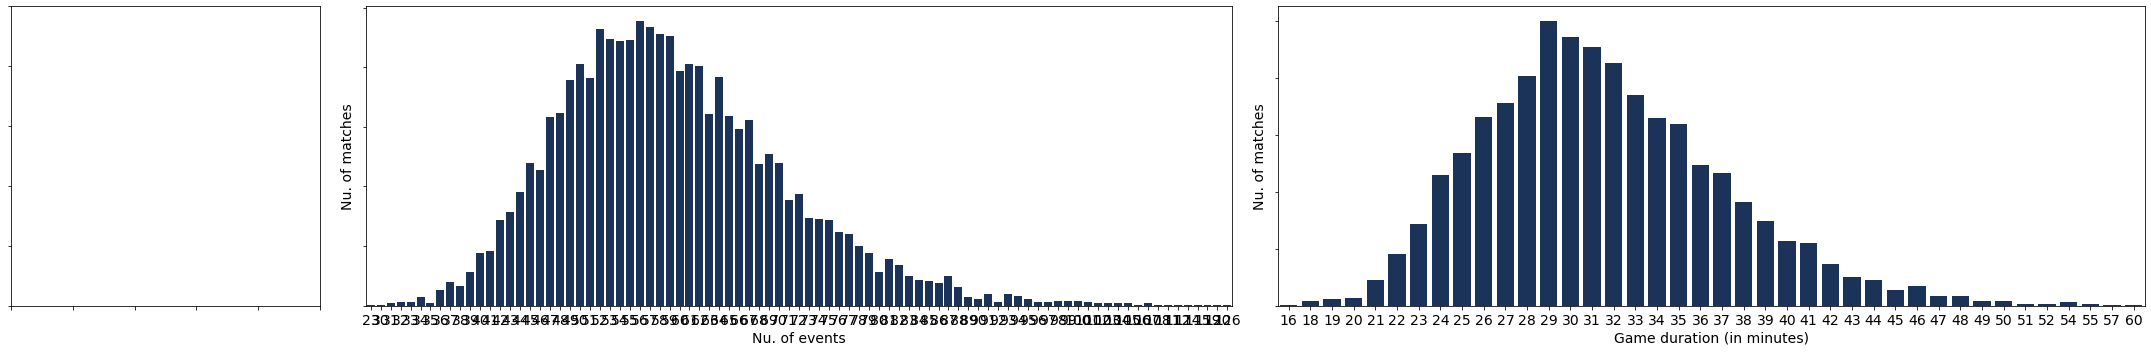

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Supondo que você já tenha seus dados e dataframe df

# Configurando a figura e os subgráficos com proporções diferentes
fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[0.15, 0.42, 0.42])

# Subgráficos
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])



# Aumenta o tamanho da fonte
ax1.set_xlabel(ax1.get_xlabel(), fontsize=14)
ax1.set_ylabel(ax1.get_ylabel(), fontsize=14)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=14)

# Segundo gráfico
sns.countplot(df['qtd_eventos'], ax=ax2, color='#112f63')
ax2.set_xlabel('Nu. of events')
ax2.set_ylabel('Nu. of matches')

# Aumenta o tamanho da fonte
ax2.set_xlabel(ax2.get_xlabel(), fontsize=14)
ax2.set_ylabel(ax2.get_ylabel(), fontsize=14)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=14)

# Terceiro gráfico
sns.countplot(df.sort_values(by=['duracao_min'])['duracao_min'], ax=ax3, color='#112f63')
ax3.set_xlabel('Game duration (in minutes)')
ax3.set_ylabel('Nu. of matches')

# Aumenta o tamanho da fonte
ax3.set_xlabel(ax3.get_xlabel(), fontsize=14)
ax3.set_ylabel(ax3.get_ylabel(), fontsize=14)
ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=14)

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()


In [12]:
df['duracao_min'].mean()

31.500326904217065

In [13]:
df['duracao_min'].max()

60

<AxesSubplot:>

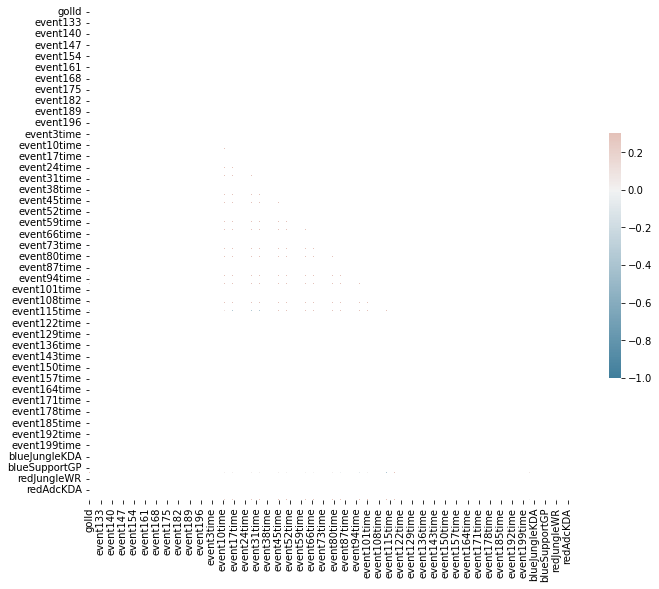

In [14]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 0.98, 'Relação entre qtd de eventos e vencedor')

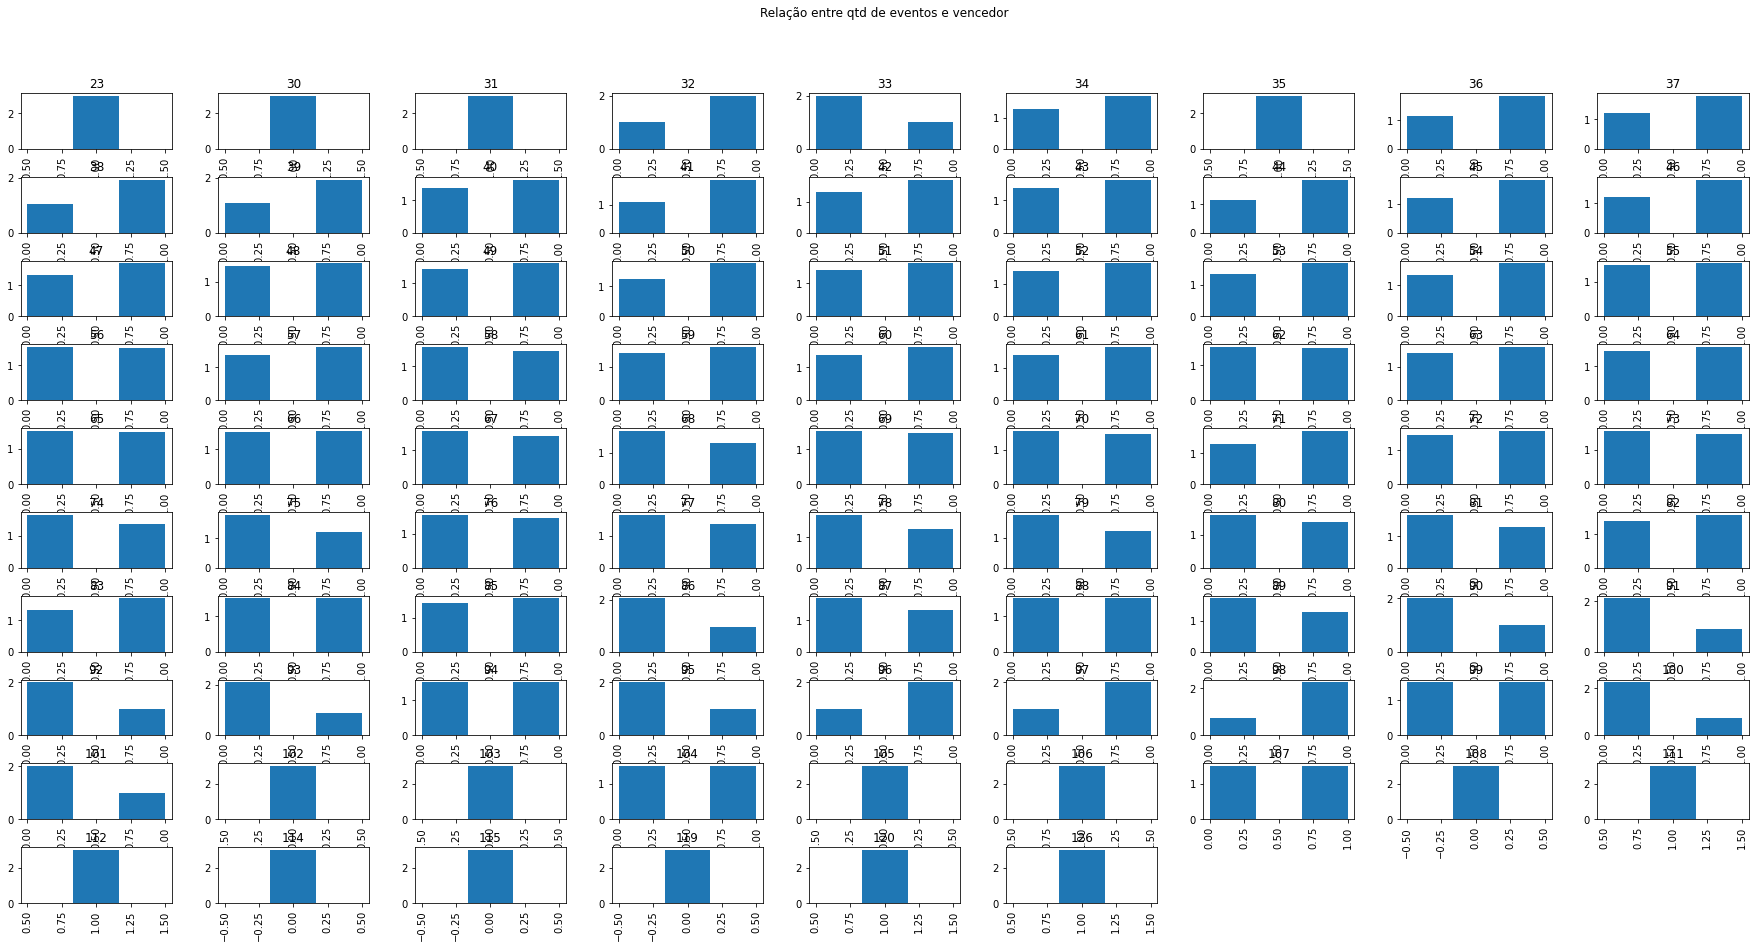

In [15]:
df.hist(column='result', by='qtd_eventos', bins=3,figsize=(30,15),density=1)
plt.suptitle('Relação entre qtd de eventos e vencedor')

Text(0.5, 0.98, 'Relação entre duração e vencedor')

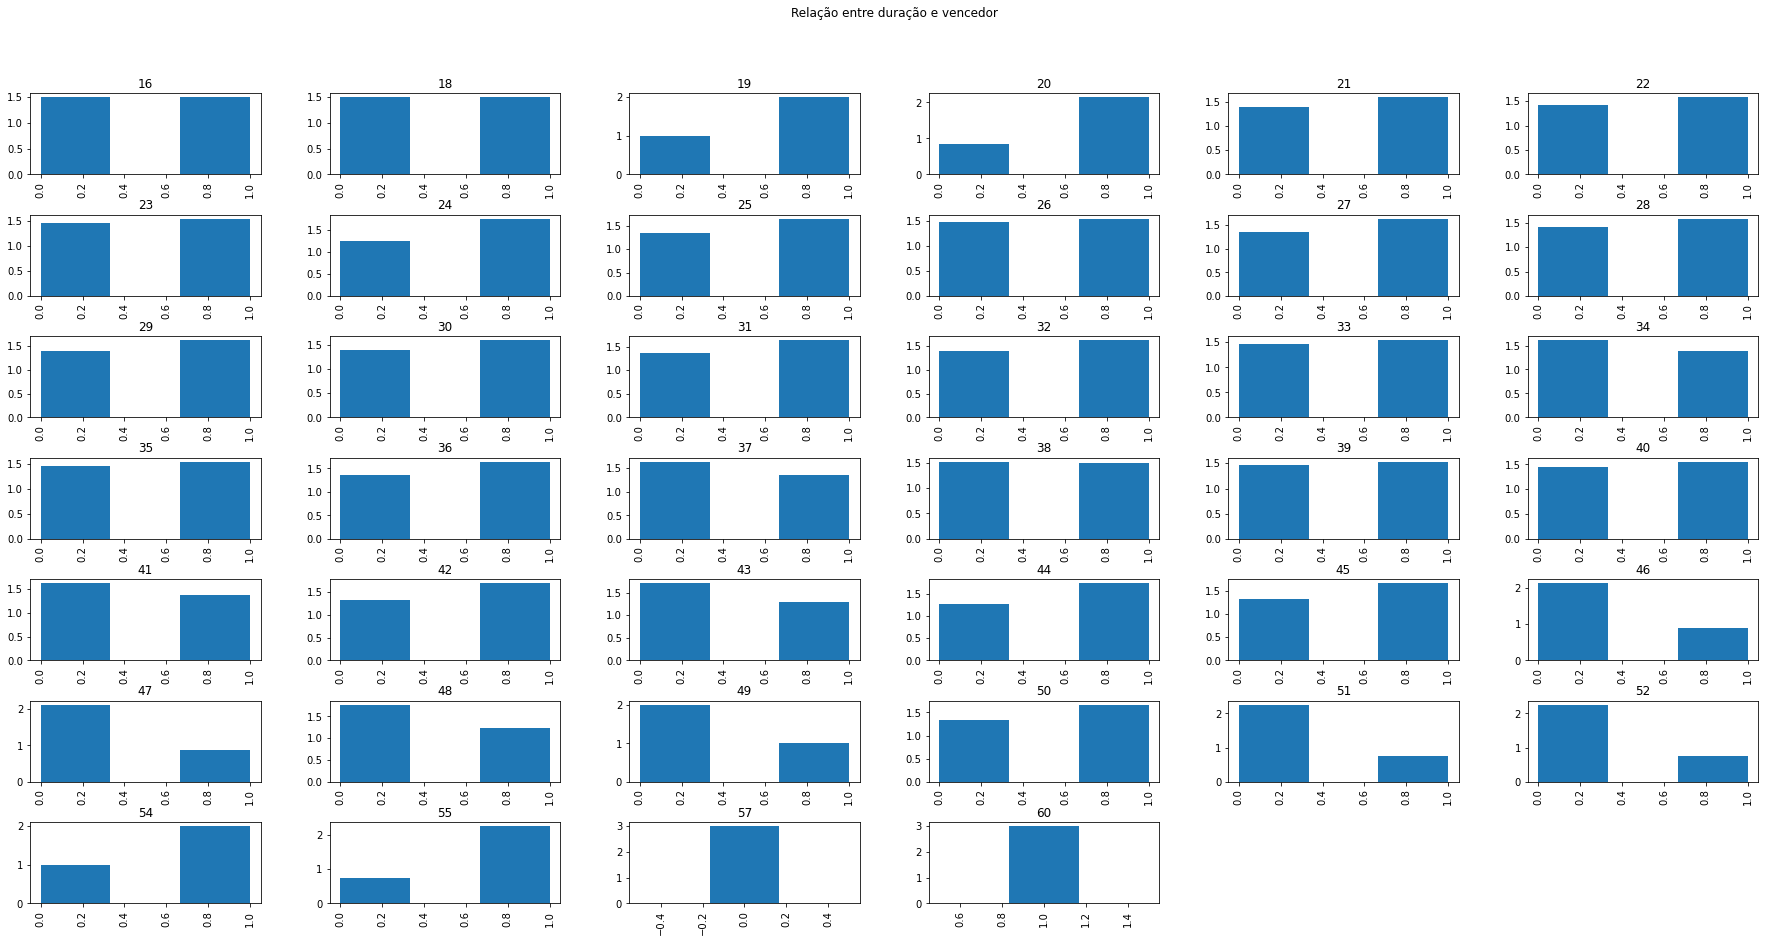

In [16]:
df.hist(column='result', by='duracao_min', bins=3,figsize=(30,15),density=1)
plt.suptitle('Relação entre duração e vencedor')

In [17]:
features = ['event1','event2','event3', 'event4', 'event5', 'duracao_min', 'blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['result'])
fig.show()

ValueError: could not convert string to float: 'RED: first_blood'

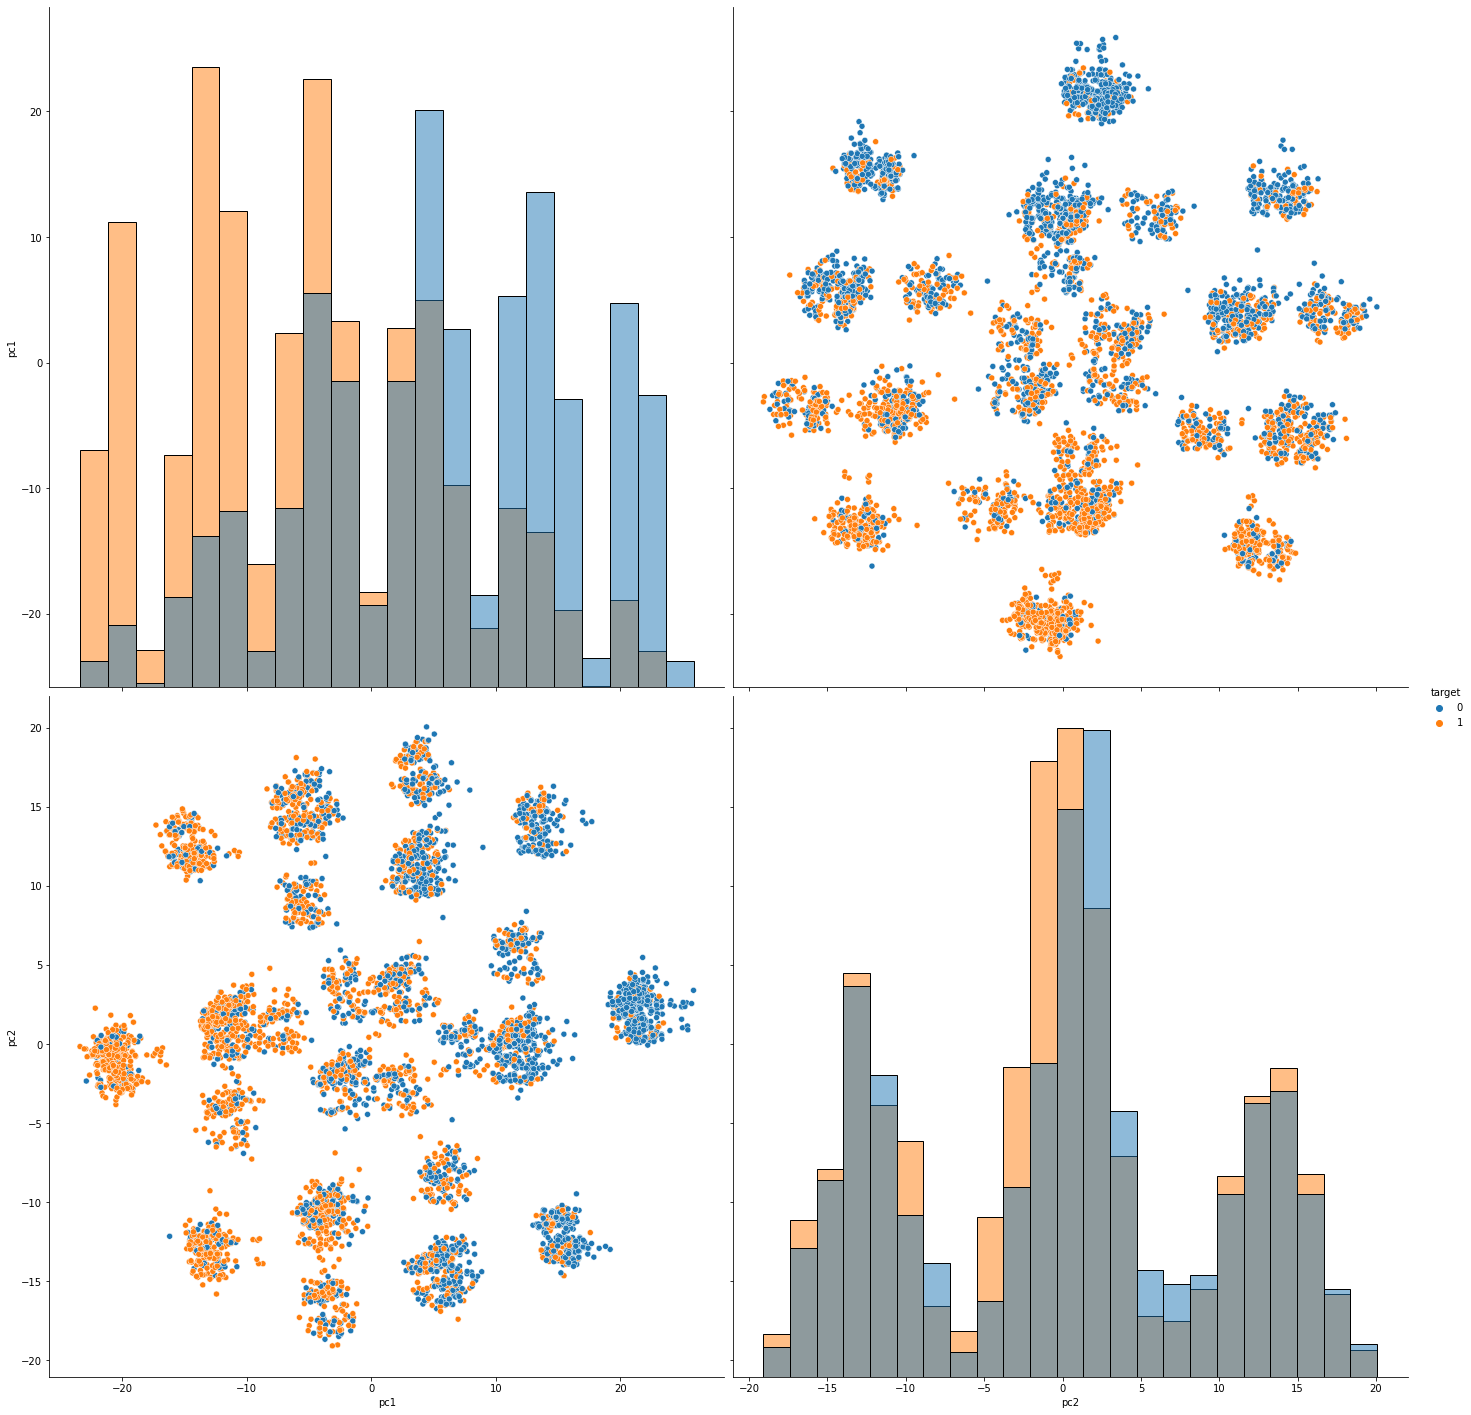

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
new_df = pd.DataFrame(X_transformed, columns=['pc1', 'pc2'])
new_df['target'] = df['result']
sns.pairplot(new_df, vars=['pc1', 'pc2'],hue='target', diag_kind='hist',height=10)
plt.show()

In [ ]:
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline


pca = Pipeline([("standarize", StandardScaler()), ("pca",PCA(n_components = 3)), ("dataframe", FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["First Comp", "Second Comp", "Third Comp"])))]).fit(X)
X3D = pca.transform(X)
px.scatter_3d(x = "First Comp", y = "Second Comp",z = "Third Comp", data_frame= X3D, color= y)

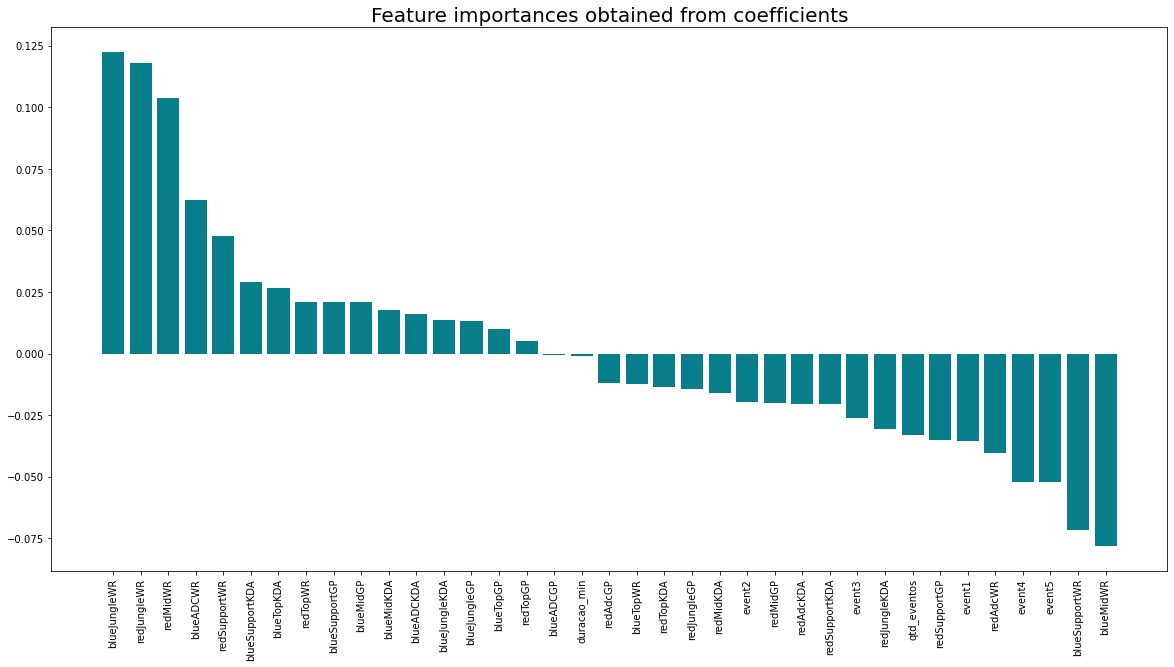

In [ ]:
# Fonte dos plots abaixo: https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=50000)
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.rcParams["figure.figsize"] = (20, 10)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

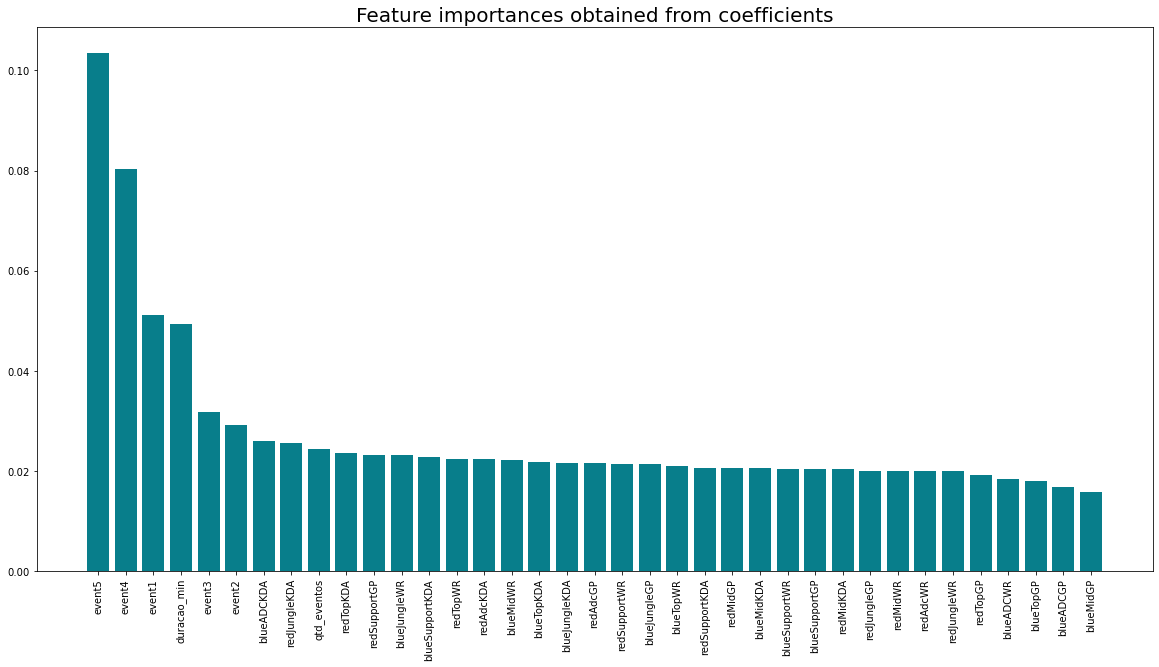

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

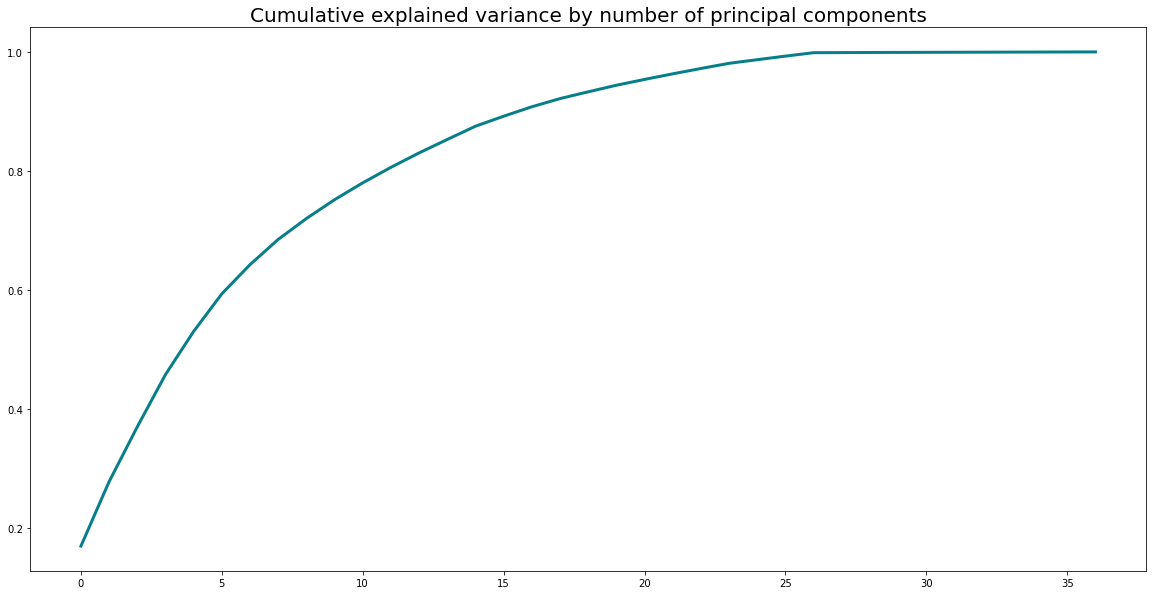

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(x)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(x.columns) + 1)],
    index=x.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37
event1,5.519028,0.939912,5.533732,-5.015163,1.812975,-0.469929,-0.182704,0.053689,0.005702,-0.006638,...,-0.000350,-0.000038,0.000251,-0.000023,0.000196,0.000017,-0.000151,0.000040,0.000022,-0.000135
event2,4.945786,-6.005308,-2.665262,1.115274,4.552598,-0.234609,0.172828,0.125100,-0.087194,-0.044839,...,0.000239,0.000106,-0.000113,-0.000039,0.000037,-0.000015,0.000143,0.000121,0.000037,0.000034
event3,3.765233,7.102276,-1.091431,3.547236,3.283948,-0.319078,0.087622,0.024018,-0.069619,0.037507,...,0.000322,0.000127,0.000006,0.000083,0.000143,0.000329,0.000144,-0.000160,-0.000089,-0.000074
event4,5.962601,-1.829304,3.404498,4.996586,-3.811120,0.268523,-0.074911,0.219490,0.193668,0.127048,...,0.000116,0.000019,0.000182,0.000264,-0.000155,0.000291,-0.000085,-0.000004,-0.000325,-0.000317
event5,6.308204,1.381511,-5.303544,-3.328310,-3.466224,0.440998,-0.036904,0.351244,-0.006851,0.053298,...,-0.000404,-0.000166,0.000047,-0.000272,-0.000111,-0.000149,-0.000036,-0.000046,0.000089,0.000023


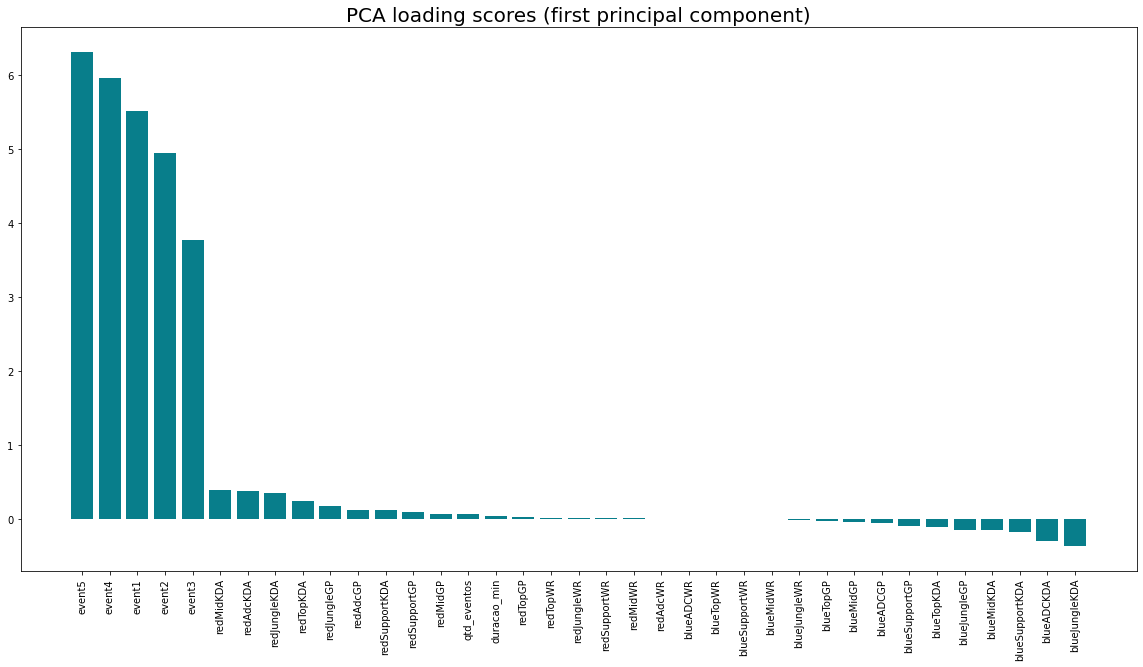

In [ ]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6014 samples in 0.001s...
[t-SNE] Computed neighbors for 6014 samples in 0.995s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6014
[t-SNE] Computed conditional probabilities for sample 2000 / 6014
[t-SNE] Computed conditional probabilities for sample 3000 / 6014
[t-SNE] Computed conditional probabilities for sample 4000 / 6014
[t-SNE] Computed conditional probabilities for sample 5000 / 6014
[t-SNE] Computed conditional probabilities for sample 6000 / 6014
[t-SNE] Computed conditional probabilities for sample 6014 / 6014
[t-SNE] Mean sigma: 7.984974
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.256210
[t-SNE] KL divergence after 300 iterations: 1.827340
